# Python Q8

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/formatted_data (1).csv")

In [3]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,10/2/2016,9:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,10/9/2016,9:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,10/16/2016,9:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,10/23/2016,9:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,10/30/2016,9:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [4]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'average rating', 'summary', 'medium image link',
       'original image link'],
      dtype='object')

## Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [11]:
season_ratings = df.groupby('season')['average rating'].mean()
season_ratings

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average rating, dtype: float64

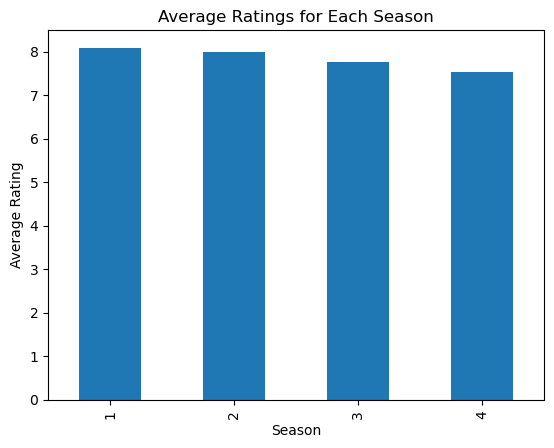

In [14]:
season_ratings.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.show()

### The average rating is almost same for all seasons and it is more or less to 8.

## Get all the episode names, whose average rating is more than 8 for every season.

In [16]:
highly_rated_episodes = df.groupby(['season', 'name'])['average rating'].mean().reset_index()
highly_rated_episodes

,season,name,average rating
0,1,Chestnut,7.7
1,1,Contrapasso,8.0
2,1,Dissonance Theory,7.9
3,1,The Adversary,8.0
4,1,The Bicameral Mind,8.7
5,1,The Original,8.0
6,1,The Stray,7.6
7,1,The Well-Tempered Clavier,8.5
8,1,Trace Decay,7.9
9,1,Trompe L'Oeil,8.6


In [18]:
highly_rated_episodes = highly_rated_episodes[highly_rated_episodes['average rating'] > 8]['name']
highly_rated_episodes

4            The Bicameral Mind
7     The Well-Tempered Clavier
9                 Trompe L'Oeil
12                      Kiksuya
16                The Passenger
18              Vanishing Point
Name: name, dtype: object

## Get all the episode names that aired before May 2019.

In [20]:
df['airdate'] = pd.to_datetime(df['airdate'])

In [21]:
episodes_before_2019 = df[df['airdate'] < pd.to_datetime('2019-05-01')]['name']
episodes_before_2019

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

## Get the episode name from each season with the highest and lowest rating

In [22]:
highest_rated_episodes = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmax()]['name'])
highest_rated_episodes

season
1    The Bicameral Mind
2               Kiksuya
3          Parce Domine
4              Zhuangzi
dtype: object

In [23]:
lowest_rated_episodes = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmin()]['name'])
lowest_rated_episodes

season
1       The Stray
2    Akane No Mai
3     Decoherence
4    The Auguries
dtype: object

## Get the summary for the most popular ( ratings ) episode in every season.

In [24]:
most_popular_episodes = df.groupby('season').apply(lambda x: x.loc[x['average rating'].idxmax()]['summary'])
most_popular_episodes

season
1    Delores finds out the truth about William's fa...
2    Another of Westworld's Host revolutionaries is...
3    If you're stuck in a loop, try walking in a st...
4                                        God is bored.
dtype: object